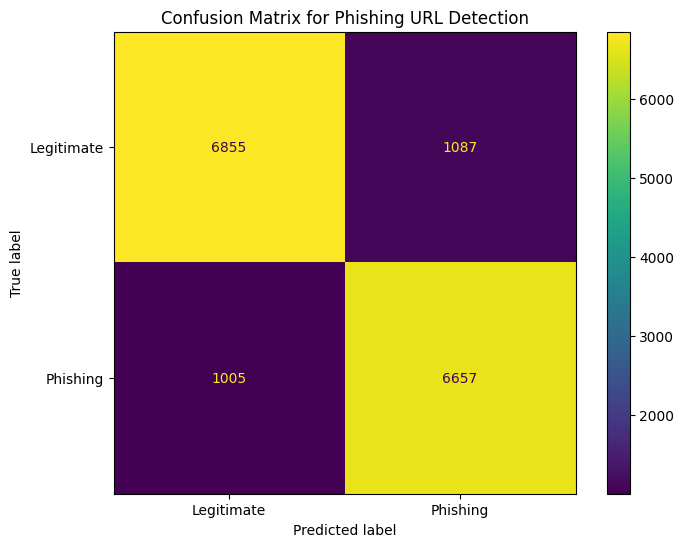

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess the dataset
df = pd.read_csv('url.csv')

# Preprocessing (since there is no null values in it, we can proceed)

df.isnull().sum()

# Scaling 

# since the database is based on the actual counting of the features among the url, we do not need to scale the data.

# splitting data into features and results
df.columns = [''] * len(df.columns)
X = df.iloc[:,:111]
Y = df.iloc[:, -1]


# Training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Fitting the model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

# Prediction

Y_pred = knn_model.predict(X_test)


# Visualization

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Phishing'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix for Phishing URL Detection')
plt.show()


filename = 'finalized_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))